In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('concertriccir2.csv')

In [5]:
df.head()

,X1,X2,Label
0,-0.469276,0.210118,1
1,-0.164164,0.986075,0
2,-0.471454,0.019974,1
3,-0.670347,-0.657977,0
4,-0.826468,0.594071,0


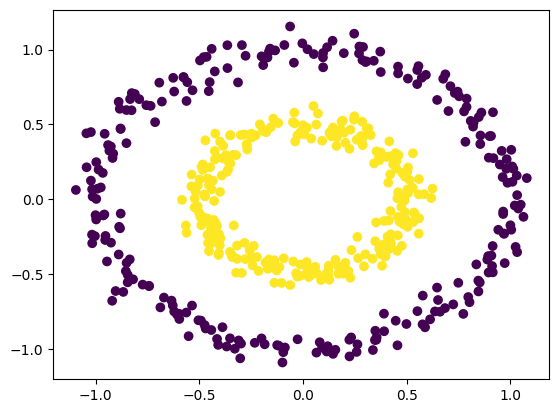

In [12]:
plt.scatter(df['X1'],df['X2'],c=df['Label'])

In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [15]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

d:\anaconda\envs\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5140 - loss: 0.6882 - val_accuracy: 0.4500 - val_loss: 0.6919
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5047 - loss: 0.6884 - val_accuracy: 0.4500 - val_loss: 0.6907
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5194 - loss: 0.6883 - val_accuracy: 0.4500 - val_loss: 0.6899
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5026 - loss: 0.6879 - val_accuracy: 0.4500 - val_loss: 0.6887
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4964 - loss: 0.6868 - val_accuracy: 0.4500 - val_loss: 0.6875
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5150 - loss: 0.6838 - val_accuracy: 0.4500 - val_loss: 0.6865
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4933 - loss: 0.6845 - val_accuracy: 0.4500 - val_loss: 0.6853
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5105 - loss: 0.6786 - val_accuracy: 0.

In [18]:
# new model using Batch Normalization
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5774 - loss: 0.7663 - val_accuracy: 0.5000 - val_loss: 0.6802
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5708 - loss: 0.8122 - val_accuracy: 0.5300 - val_loss: 0.6654
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6135 - loss: 0.7007 - val_accuracy: 0.5700 - val_loss: 0.6563
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6021 - loss: 0.6587 - val_accuracy: 0.6200 - val_loss: 0.6495
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6920 - loss: 0.5647 - val_accuracy: 0.6200 - val_loss: 0.6417
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7380 - loss: 0.5372 - val_accuracy: 0.6600 - val_loss: 0.6343
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8110 - loss: 0.4520 - val_accuracy: 0.7400 - val_loss: 0.6274
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7874 - loss: 0.4520 - val_accuracy: 0.

-  here we can see big difference in accuracy and loss using Batch Normalization

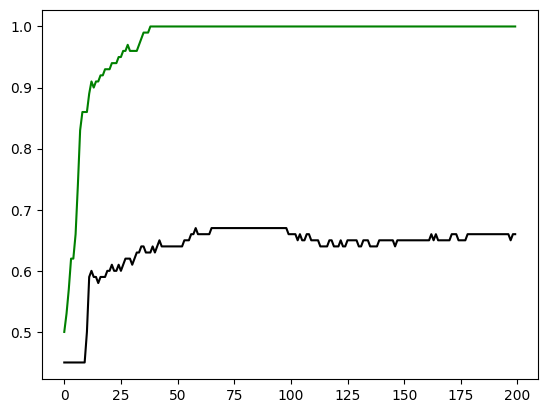

In [21]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')